In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Loading the dataset

In [2]:
df = pd.read_excel("/content/2019 Winter Data Science Intern Challenge Data Set.xlsx")

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


Cheking naive value for mean

In [4]:
df['order_amount'].mean()

df['Price_of_one'] = df['order_amount']/df['total_items']

Making a boxplot to visualize the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


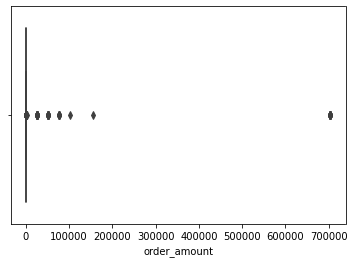

In [5]:
sns.boxplot(df["order_amount"])

Finding the culprit store that is raising the mean prices

In [6]:
print(df.groupby(df['shop_id'])['Price_of_one'].mean().reset_index()\
.sort_values(by=['Price_of_one'], ascending = False).head())

outlier_id = np.array(df.groupby(df['shop_id'])['Price_of_one'].mean().reset_index()\
.sort_values(by=['Price_of_one'], ascending = False)['shop_id'])[0]

idx = 0

print("Culprit shop: ", outlier_id)



    shop_id  Price_of_one
77       78       25725.0
41       42         352.0
11       12         201.0
88       89         196.0
98       99         195.0
Culprit shop:  78


We can definitely see that shop number 78 is driving the rise in prices, followed by shop 42

In [7]:
shop_78 = df[df['shop_id'] == 78]

print(shop_78['order_amount'].mean())
print(shop_78['order_amount'].std())

shop_78['order_amount'] = shop_78['order_amount']/100

print(shop_78['order_amount'].mean())
print(shop_78['order_amount'].std())

49213.04347826087
26472.227448534744
492.1304347826087
264.72227448534744


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


It could be the case that the prices for store 78 are in cents rather than dollars, hence I've tried to reduce the mean by dividing the numbers by 100. The values now resemble the rest of the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


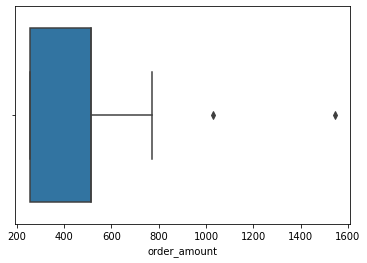

In [8]:
sns.boxplot(shop_78['order_amount'])

In [15]:
indices = np.where(df['shop_id'] == 78)[0]
values = np.array(df['order_amount'])

for i in range(0, len(df)):
  if i in indices:
    values[i]/=100

df['order_amount'] = values

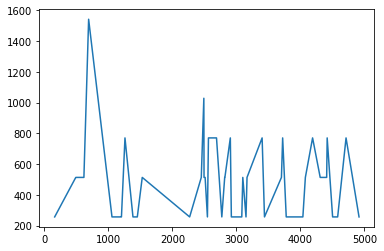

In [16]:
shop_78 = df[df['shop_id'] == 78]

plt.plot(shop_78['order_amount'])

New mean after reducing shop 78 values by factor of 100

In [18]:
df["Price_of_one"] = df["order_amount"]/df['total_items']

In [19]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,Price_of_one
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,2696.891600,8.78720,153.437283
std,1443.520003,29.006118,87.798982,40966.762305,116.32032,32.677743
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,352.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


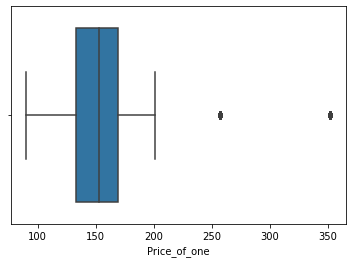

In [20]:
sns.boxplot(df["Price_of_one"])

In [21]:
df['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

In [30]:
two_thousand_item_store = np.where(df['total_items'] == 2000)
print(len(two_thousand_item_store[0]))
print(df.iloc[two_thousand_item_store[0][0]].shop_id)

17
42


Store number 42 is selling 2000 items per order 17 times, driving up the mean

In [38]:
df = df[df['shop_id'] != 42]

df["Price_of_one"] = df["order_amount"]/df['total_items']

print("Average Price of one shoe",df["Price_of_one"].mean())
print("Average Price of an order",df["order_amount"].mean())

Average Price of one shoe 151.39107227049237
Average Price of an order 301.9361487169125


Hence we can conclude after dropping store 42 from the data that the price of an order on average is \$302 and the price of one shoe on average is \$151

In [39]:
df = df[df['shop_id'] != 78]

df["Price_of_one"] = df["order_amount"]/df['total_items']

print("Average Price of one shoe",df["Price_of_one"].mean())
print("Average Price of an order",df["order_amount"].mean())

Average Price of one shoe 150.40016316540894
Average Price of an order 300.1558229655313


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Dropping store 78 from the data doesnt cause much change as we can see above.